In [207]:
import matplotlib.pyplot as pl
import matplotlib
matplotlib.rcParams.update({'font.size': 14})

In [208]:
from Queue import *
from Metrics import *

In [209]:
# removed variables from main so i can pass new ones in notebook
def main(n_servers, discipline, mean_service_rate, mean_arrival_rate, max_customers, max_runtime):    # Simulation params
    print('Running queueing system simulation...')
    simulation = QueueSimulation(n_servers, discipline, mean_service_rate, mean_arrival_rate, max_customers, max_runtime)
    simulation.run()

    print('Simulation finished!')
    print('')
    Metrics = QueueMetrics(simulation)
    expected_metrics = Metrics.get_expected_metrics()
    measured_metrics = Metrics.get_measured_metrics()

    print("EXPECTED")
    for key, value in expected_metrics.items():
        print(f"{key} = {value:.3f}")

    print("\nMEASURED")
    for key, value in measured_metrics.items():
        print(f"{key} = {value[0]:.3f}, Variance: {value[1]}")

    return simulation.get_log()

In [229]:
# run system for different server numbers but same utilization
discipline = 'FIFO'
mean_service_rate = 1
max_customers = 10000000
max_runtime = 1000000

n_servers = 1
mean_arrival_rate = 0.7 * n_servers
result_1 = main(n_servers, discipline, mean_service_rate, mean_arrival_rate, max_customers, max_runtime)

n_servers = 2
mean_arrival_rate = 0.7*n_servers
result_2= main(n_servers, discipline, mean_service_rate, mean_arrival_rate, max_customers, max_runtime)

n_servers = 4
mean_arrival_rate = 0.7*n_servers
result_4 = main(n_servers, discipline, mean_service_rate, mean_arrival_rate, max_customers, max_runtime)

Running queueing system simulation...
Simulation finished!

EXPECTED
p_0 = 0.300
delay probability = 0.700
expected queue length = 1.633
expected waiting time = 2.333

MEASURED
Average waiting time = 2.356, Variance: 10.513515778970183
Average queue length = 1.650, Variance: 6.8156777059007645
Running queueing system simulation...
Simulation finished!

EXPECTED
p_0 = 0.176
delay probability = 0.576
expected queue length = 1.345
expected waiting time = 0.961

MEASURED
Average waiting time = 0.957, Variance: 2.2591490880564913
Average queue length = 1.342, Variance: 5.797106491739744
Running queueing system simulation...
Simulation finished!

EXPECTED
p_0 = 0.050
delay probability = 0.429
expected queue length = 1.000
expected waiting time = 0.357

MEASURED
Average waiting time = 0.356, Variance: 0.45719845050609675
Average queue length = 0.996, Variance: 4.576142088806205


In [230]:
len(result_1[0])

700276

In [211]:
s =[ [result_1[0][i],result_1[1][i]] for i in range(len(result_1[0]))]
np.savetxt('test.csv',s,delimiter=',')

10.514183461189658


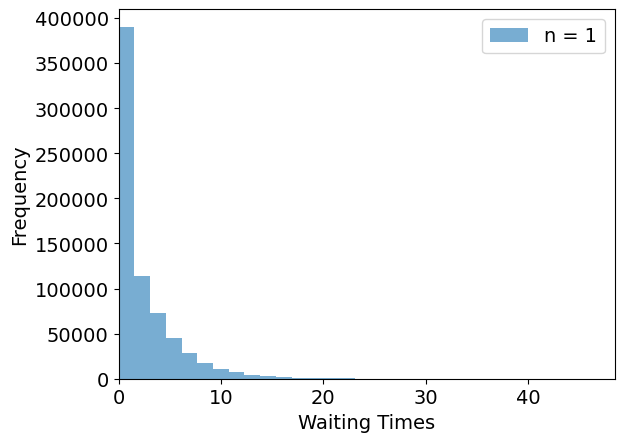

2.323252740625384


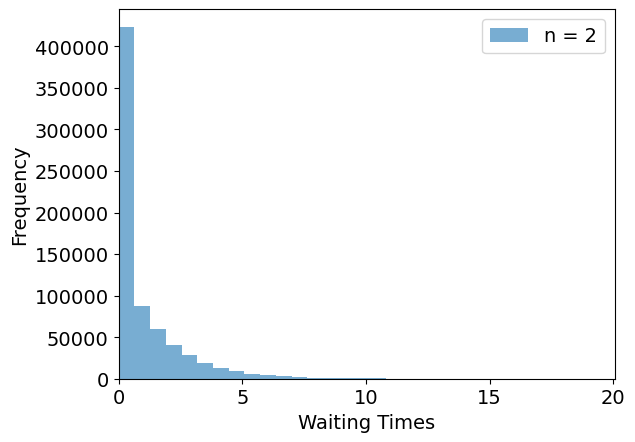

0.45392548792416404


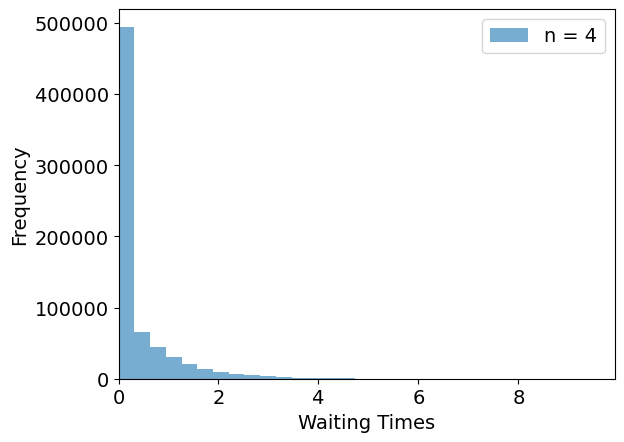

In [232]:
# this is just plotting histograms for each system
data_array = [result_1[0],result_2[0],result_4[0]]
servers = [1,2,4]
for i in range(3):
    data=data_array[i][:700000]
    var = np.sum((data - np.mean(data))**2)/(len(data) - 1)
    print(var)
    binwidth = 0.8
    bins= np.arange(min(data), max(data) + binwidth, binwidth)
    # bins=10
    plt.hist(data, bins=30,label = "n = " + str(servers[i]),alpha = 0.6)
    plt.legend(loc='best')
    plt.xlabel('Waiting Times')
    # plt.title("Waiting times for n servers with constant utilization")
    plt.ylabel('Frequency')
    plt.xlim(0)
    plt.savefig("histogram of single sim n{} c{} a0.7 - s1.png".format(servers[i],len(data)))
    plt.show()


Running queueing system simulation...
Simulation finished!

EXPECTED
p_0 = 0.500
delay probability = 0.500
expected queue length = 0.500
expected waiting time = 1.000

MEASURED
Average waiting time = 0.985, Variance: 2.9442568786320233
Average queue length = 0.492, Variance: 1.234910655009166
Running queueing system simulation...
Simulation finished!

EXPECTED
p_0 = 0.465
delay probability = 0.535
expected queue length = 0.616
expected waiting time = 1.151

MEASURED
Average waiting time = 1.152, Variance: 3.4975239718556033
Average queue length = 0.617, Variance: 1.6119936499927712
Running queueing system simulation...
Simulation finished!

EXPECTED
p_0 = 0.430
delay probability = 0.570
expected queue length = 0.756
expected waiting time = 1.326

MEASURED
Average waiting time = 1.377, Variance: 4.88891903178783
Average queue length = 0.787, Variance: 2.406254635312283
Running queueing system simulation...
Simulation finished!

EXPECTED
p_0 = 0.395
delay probability = 0.605
expected que

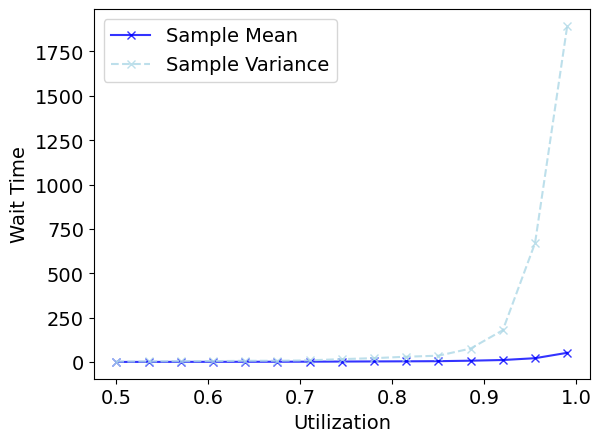

In [217]:
# loop through different utilization values 
# i calcualted sample var here but not sure thats right

discipline = 'FIFO'
max_customers = 10000000
max_runtime = 100000

mean_ar = []
var_ar = []
u_ar = np.linspace(0.5,0.99,15)
for u in u_ar:
    n_servers = 1
    mean_service_rate = 1
    mean_arrival_rate = u*n_servers
    
    result = main(n_servers, discipline, mean_service_rate, mean_arrival_rate, max_customers, max_runtime)
    data = result[0]
    mean = np.mean(data)
    mean_ar.append(mean)
    var = np.sum((data - np.mean(data))**2)/(len(data) - 1)
    var_ar.append(var)

results = pd.DataFrame(columns = ['U','mean','var'], data = zip(u_ar,mean_ar,var_ar))
plt.plot(results['U'],results['mean'], '-x',alpha = 0.8,label = 'Sample Mean', c = 'b')
plt.plot(results['U'],results['var'],linestyle = 'dashed',marker='x',color = 'lightblue',alpha = 0.8,label = 'Sample Variance')

plt.legend(loc='best')
plt.xlabel('Utilization')
plt.ylabel('Wait Time')
plt.savefig('n1 wait time utilization.png')


Running queueing system simulation...
Simulation finished!

EXPECTED
p_0 = 0.333
delay probability = 0.333
expected queue length = 0.333
expected waiting time = 0.333

MEASURED
Average waiting time = 0.340, Variance: 0.5847819458609368
Average queue length = 0.345, Variance: 0.9408169188871115
Running queueing system simulation...
Simulation finished!

EXPECTED
p_0 = 0.303
delay probability = 0.373
expected queue length = 0.429
expected waiting time = 0.401

MEASURED
Average waiting time = 0.393, Variance: 0.708982403980108
Average queue length = 0.419, Variance: 1.294289939892998
Running queueing system simulation...
Simulation finished!

EXPECTED
p_0 = 0.274
delay probability = 0.414
expected queue length = 0.549
expected waiting time = 0.481

MEASURED
Average waiting time = 0.455, Variance: 0.7938386212120644
Average queue length = 0.510, Variance: 1.4739112477682998
Running queueing system simulation...
Simulation finished!

EXPECTED
p_0 = 0.246
delay probability = 0.456
expected q

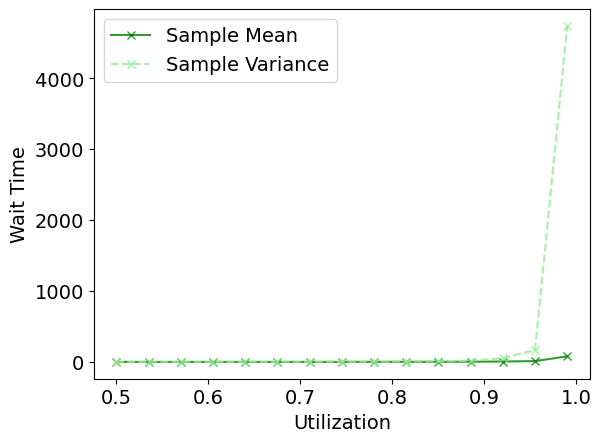

In [218]:
# loop through different utilization values 
# i calcualted sample var here but not sure thats right

discipline = 'FIFO'
max_customers = 10000000
max_runtime = 100000

mean_ar = []
var_ar = []
u_ar = np.linspace(0.5,0.99,15)
for u in u_ar:
    n_servers = 2
    mean_service_rate = 1
    mean_arrival_rate = u*n_servers
    
    result = main(n_servers, discipline, mean_service_rate, mean_arrival_rate, max_customers, max_runtime)
    data = result[0]
    mean = np.mean(data)
    mean_ar.append(mean)
    var = np.sum((data - np.mean(data))**2)/(len(data) - 1)
    var_ar.append(var)

results = pd.DataFrame(columns = ['U','mean','var'], data = zip(u_ar,mean_ar,var_ar))
plt.plot(results['U'],results['mean'], '-x',alpha = 0.8,label = 'Sample Mean', c = 'g')
plt.plot(results['U'],results['var'],linestyle = 'dashed',marker='x',color = 'lightgreen',alpha = 0.8,label = 'Sample Variance')

plt.legend(loc='best')
plt.xlabel('Utilization')
plt.ylabel('Wait Time')
plt.savefig('n2 wait time utilization.png')


Running queueing system simulation...
Simulation finished!

EXPECTED
p_0 = 0.130
delay probability = 0.174
expected queue length = 0.174
expected waiting time = 0.087

MEASURED
Average waiting time = 0.087, Variance: 0.08068321579673644
Average queue length = 0.175, Variance: 0.5088842085760421
Running queueing system simulation...
Simulation finished!

EXPECTED
p_0 = 0.112
delay probability = 0.210
expected queue length = 0.242
expected waiting time = 0.113

MEASURED
Average waiting time = 0.109, Variance: 0.1005892987755413
Average queue length = 0.233, Variance: 0.696618487124881
Running queueing system simulation...
Simulation finished!

EXPECTED
p_0 = 0.095
delay probability = 0.250
expected queue length = 0.331
expected waiting time = 0.145

MEASURED
Average waiting time = 0.145, Variance: 0.14524522411787455
Average queue length = 0.332, Variance: 1.07715410778953
Running queueing system simulation...
Simulation finished!

EXPECTED
p_0 = 0.081
delay probability = 0.293
expected 

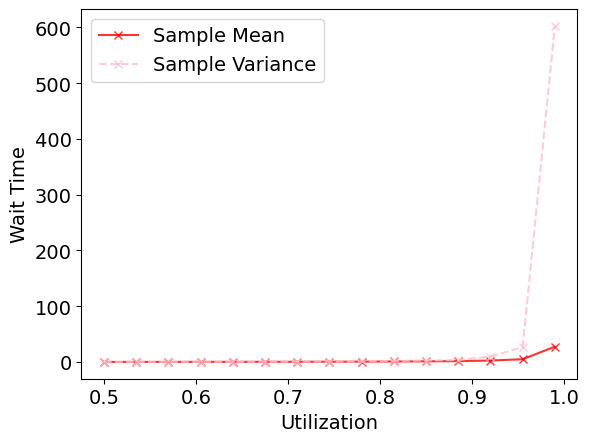

In [219]:
# loop through different utilization values 
# i calcualted sample var here but not sure thats right

discipline = 'FIFO'
max_customers = 10000000
max_runtime = 100000

mean_ar = []
var_ar = []
u_ar = np.linspace(0.5,0.99,15)
for u in u_ar:
    n_servers = 4
    mean_service_rate = 1
    mean_arrival_rate = u*n_servers
    
    result = main(n_servers, discipline, mean_service_rate, mean_arrival_rate, max_customers, max_runtime)
    data = result[0]
    mean = np.mean(data)
    mean_ar.append(mean)
    var = np.sum((data - np.mean(data))**2)/(len(data) - 1)
    var_ar.append(var)

results = pd.DataFrame(columns = ['U','mean','var'], data = zip(u_ar,mean_ar,var_ar))
plt.plot(results['U'],results['mean'], '-x',alpha = 0.8,label = 'Sample Mean', c = 'r')
plt.plot(results['U'],results['var'],linestyle = 'dashed',marker='x',color = 'pink',alpha = 0.8,label = 'Sample Variance')

plt.legend(loc='best')
plt.xlabel('Utilization')
plt.ylabel('Wait Time')
plt.savefig('n4 wait time utilization.png')


In [214]:
#weird confidence interval that doesn't work

# mean = n1_results['mean']
# sd = np.sqrt(n1_results['var'])
# # plt.plot(n1_results['U'],mean,'-x')
# ci_min = mean-sd*(np.ones(len(sd))*1.96/np.sqrt(len(sd)))
# ci_max = mean+sd*(np.ones(len(sd))*1.96/np.sqrt(len(sd)))
# plt.fill_between(n1_results['U'],ci_min,ci_max,alpha=0.2,label = "95% Confidence Interval",color='blue')
# plt.plot(n1_results['U'],n1_results['mean'], '-x',alpha = 0.8,label = 'Sample Mean', c = 'b')

# mean = n2_results['mean']
# sd = np.sqrt(n2_results['var'])
# # plt.plot(n2_results['U'],mean,'-x')
# ci_min = mean-sd*(np.ones(len(sd))*1.96/np.sqrt(len(sd)))
# ci_max = mean+sd*(np.ones(len(sd))*1.96/np.sqrt(len(sd)))
# plt.fill_between(n2_results['U'],ci_min,ci_max,alpha=0.2,label = "95% Confidence Interval",color='green')
# plt.plot(n2_results['U'],n2_results['mean'], '-x',alpha = 0.8,label = 'Sample Mean', c = 'g')

# mean = n4_results['mean']
# sd = np.sqrt(n4_results['var'])
# # plt.plot(n4_results['U'],mean,'-x')
# ci_min = mean-sd*(np.ones(len(sd))*1.96/np.sqrt(len(sd)))
# ci_max = mean+sd*(np.ones(len(sd))*1.96/np.sqrt(len(sd)))
# plt.fill_between(n4_results['U'],ci_min,ci_max,alpha=0.2,label = "95% Confidence Interval",color='red')
# plt.plot(n4_results['U'],n4_results['mean'], '-x',alpha = 0.8,label = 'Sample Mean', c = 'r')

# # plt.plot(n2_results['U'],np.sqrt(n2_results['var']),linestyle = 'dashed',marker='x',color = 'lightgreen',alpha = 0.8,label = 'Sample Variance')
# plt.legend(loc='best')
# plt.xlabel('Utilization')
# plt.ylabel('Wait Time')
# plt.savefig('n2 wait time utilization.png')

In [215]:
# section on cumulative wait times
discipline = 'FIFO'
mean_service_rate = 1
max_customers = 10000000
max_runtime = 100000

n_servers = 1
mean_arrival_rate = 0.99 * n_servers
result_1 = main(n_servers, discipline, mean_service_rate, mean_arrival_rate, max_customers, max_runtime)

n_servers = 2
mean_arrival_rate = 0.99*n_servers
result_2= main(n_servers, discipline, mean_service_rate, mean_arrival_rate, max_customers, max_runtime)

n_servers = 4
mean_arrival_rate = 0.99*n_servers
result_4 = main(n_servers, discipline, mean_service_rate, mean_arrival_rate, max_customers, max_runtime)

Running queueing system simulation...
Simulation finished!

EXPECTED
p_0 = 0.010
delay probability = 0.990
expected queue length = 98.010
expected waiting time = 99.000

MEASURED
Average waiting time = 52.755, Variance: 1963.6510165038094
Average queue length = 52.039, Variance: 1957.0901627392982
Running queueing system simulation...
Simulation finished!

EXPECTED
p_0 = 0.005
delay probability = 0.985
expected queue length = 97.517
expected waiting time = 49.251

MEASURED
Average waiting time = 35.289, Variance: 959.1789219187705
Average queue length = 69.640, Variance: 3773.159453040977
Running queueing system simulation...


KeyboardInterrupt: 

In [ ]:
data = [result_1[0],result_2[0],result_4[0]]
n = [1,2,4]
data_ar = []
for i in range(3):
    d = data[i]
    x = np.linspace(0,300,100)
    cumulative = [len(d[d< i])/len(d) for i in x]
    data_ar.append(cumulative)
    plt.plot(x,cumulative,label = "n = "+str(n[i]))
plt.legend(loc='best')
plt.xlabel('Wait times')
plt.ylabel('Cumulative Distribution')

In [ ]:
from scipy.optimize import curve_fit

def cum_exp(x,a):
    return 1 - np.exp(-a*x)

In [ ]:
for i in range(len(data_ar)):
    popt, pcov = curve_fit(cum_exp,x,data_ar[i],(0.7))
    print(popt,pcov)